In [5]:
import numpy as np
import scikit_posthocs as sp # pip3 install scikit-posthocs
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats # pip3 install autorank
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib import gridspec

In [18]:
cols = ["#52952c",
"#80d358",
"#328dee",
"#d7a532",
"#d5702e",
"#b166d0"]
cmap = lambda i: cols[i]

In [15]:
name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}

In [22]:
df = pd.read_csv('full_results.csv')
df['Dataset and Classifier'] = df['data'].map(name_nicely) + "\n " + df['model'].map(name_nicely)
df['Defence'] = df['defence'].map(name_nicely)
df['Defence'] = pd.Categorical(df['Defence'], ['BAARD', 'MagNet', 'RC', 'LID', 'FS'])
df = df.sort_values("Defence")
df

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr,Dataset and Classifier,Defence
0,banknote,dnn,apgd,0.05,baard,0.688442,0.924623,0.000,Banknote\n DNN,BAARD
1783,cifar10,resnet,cw2,5.00,baard,0.000000,0.164000,0.070,CIFAR-10\n ResNet,BAARD
1782,cifar10,resnet,cw2,5.00,baard,0.000000,0.153000,0.061,CIFAR-10\n ResNet,BAARD
1781,cifar10,resnet,cw2,5.00,baard,0.000000,0.094000,0.034,CIFAR-10\n ResNet,BAARD
1780,cifar10,resnet,cw2,5.00,baard,0.000000,0.151000,0.062,CIFAR-10\n ResNet,BAARD
...,...,...,...,...,...,...,...,...,...,...
2514,cifar10,vgg,fgsm,0.10,fs,0.033000,0.273000,0.049,CIFAR-10\n VGG,FS
2513,cifar10,vgg,fgsm,0.10,fs,0.039000,0.272000,0.044,CIFAR-10\n VGG,FS
2512,cifar10,vgg,fgsm,0.10,fs,0.037000,0.274000,0.042,CIFAR-10\n VGG,FS
3651,mnist,dnn,apgd2,3.00,fs,0.083000,0.931000,0.061,MNIST\n DNN,FS


In [27]:
#files_csv = glob.glob('Tables/*csv')

In [28]:
#files_csv = np.sort(files_csv)
#print(*files_csv, sep='\n')
#titles = ['Banknote\n NN',
#         'Banknote\n SVM',
#         'Banknote\n Tree',
#         'BrCancer\n NN',
#         'BrCancer\n SVM',
#         'BrCancer\n Tree',
#         'CIFAR-10\n ResNet',
#         'CIFAR-10\n VGG',
#         'HTRU2\n NN',
#         'HTRU2\n SVM',
#         'HTRU2\n Tree',
#         'MNIST\n NN']

In [29]:
#dfs = []
#for i in range(len(files_csv)):
#    df = pd.read_csv(files_csv[i])
#    df = df.drop(columns=['Unnamed: 0'])
#    df = df.replace('baard_2stage', 'BAARD (2)')
#    df = df.replace('baard_3stage', 'BAARD (3)')
#    df = df.replace('lid', 'LID')
#    df = df.replace('rc', 'RC')
#    df = df.replace('megnet', 'MagNet')
#    df = df.replace('magnet', 'MagNet')
#    df = df.replace('fs', 'FS')
#    df['Dataset and Classifier'] = titles[i] #os.path.basename(f)
#    dfs.append(df)
#res = pd.concat(dfs)
#res['Defence'] = pd.Categorical(res['Defence'], ['BAARD', 'MagNet', 'RC', 'LID', 'FS'])
#res = res.sort_values("Defence")

In [30]:
#res

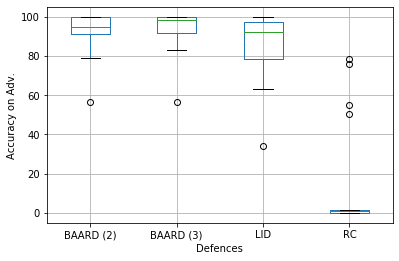

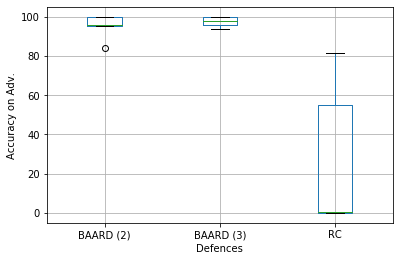

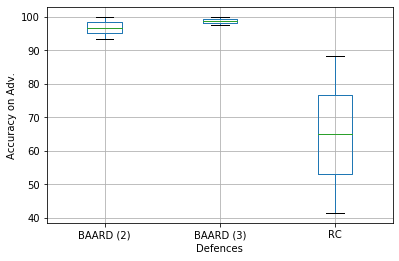

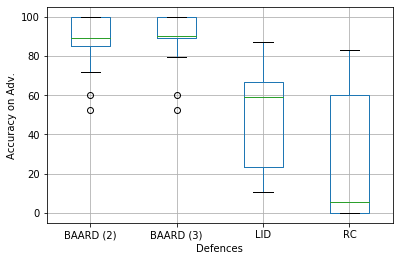

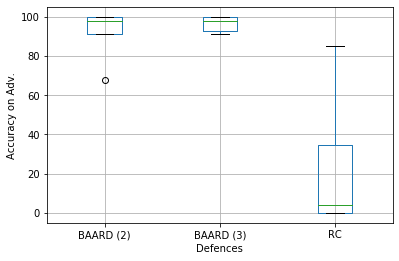

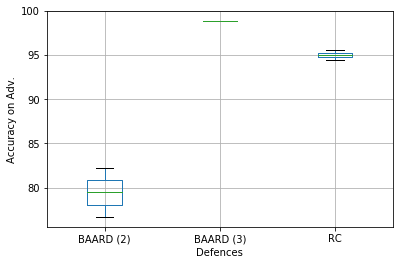

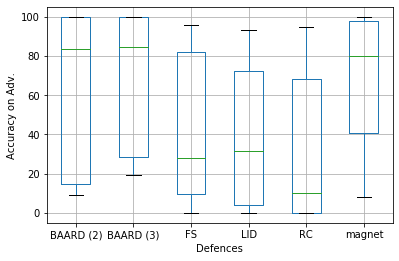

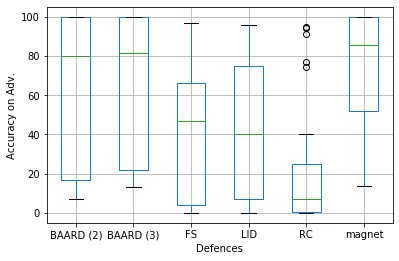

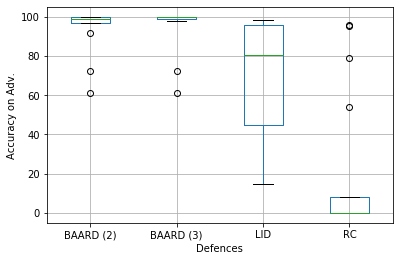

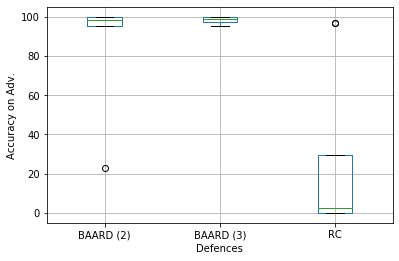

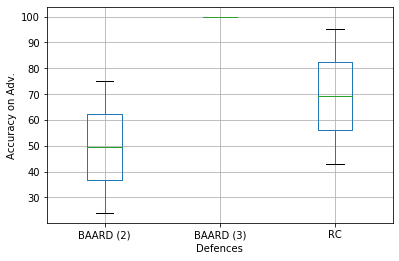

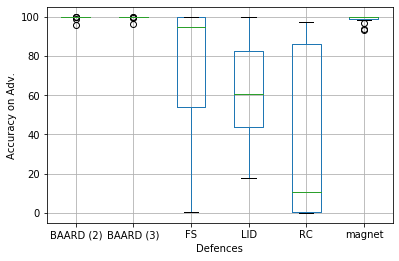

In [22]:
for i, d in enumerate(dfs):
    boxplot = d.boxplot(column=['Acc_on_adv'], by=['Defence'])
    boxplot.set_title('')
    plt.ylabel('Accuracy on Adv.')
    plt.xlabel('Defences')
    plt.suptitle('')

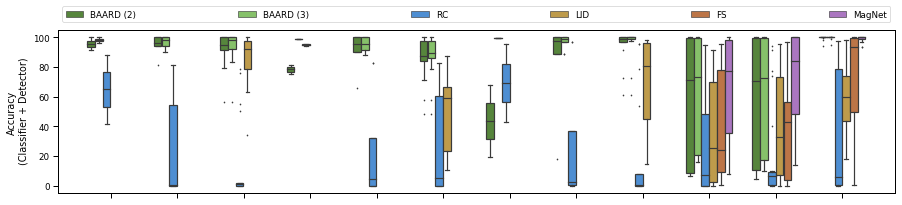

In [6]:
plt.figure(figsize=(15,3))
sns.set_context("paper")

ax = sns.boxplot(x='Dataset and Classifier', y='Acc_on_adv', hue='Defence', data=res, 
                 order=['Banknote\n Tree', 'Banknote\n SVM', 'Banknote\n NN', 
                       'BrCancer\n Tree', 'BrCancer\n SVM', 'BrCancer\n NN',
                       'HTRU2\n Tree', 'HTRU2\n SVM', 'HTRU2\n NN',
                       'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=cols, saturation=0.7, width=0.7, fliersize=0.8)
ax.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])

for i in range(len(res['Dataset and Classifier'].unique())-1):
    plt.vlines(i+.5, 0, 100, linestyles='solid', colors='white')#, alpha=0.2)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=6, mode="expand", borderaxespad=0.5)
plt.savefig('Plots/Boxplot_ACC_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

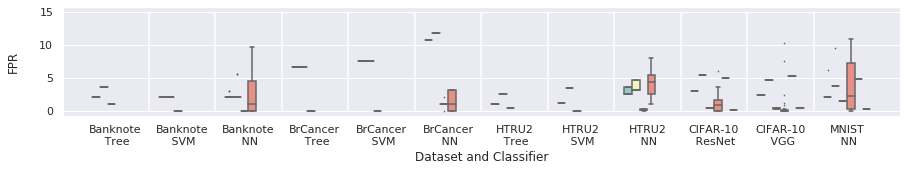

<Figure size 432x288 with 0 Axes>

In [211]:
plt.figure(figsize=(15,2))

ax = sns.boxplot(x='Dataset and Classifier', y='FPR', hue='Defence', data=res, 
                 order=['Banknote\n Tree', 'Banknote\n SVM', 'Banknote\n NN', 
                       'BrCancer\n Tree', 'BrCancer\n SVM', 'BrCancer\n NN',
                       'HTRU2\n Tree', 'HTRU2\n SVM', 'HTRU2\n NN',
                       'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette="Set3", saturation=0.7, width=0.7, fliersize=0.8)
ax.set(ylabel="FPR\n  ")

for i in range(len(res['Dataset and Classifier'].unique())-1):
    plt.vlines(i+.5, 0, 15, linestyles='solid', colors='white')#, alpha=0.2)
plt.legend([],[], frameon=False)
plt.show()
plt.savefig('Plots/Boxplot_FPR_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

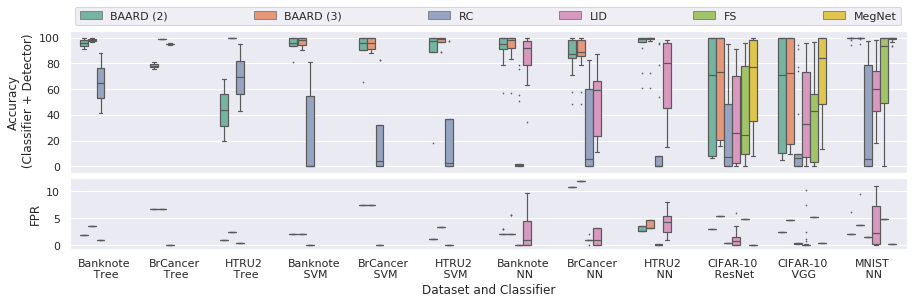

In [212]:
sns.set_theme()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.2})
#f, ax = plt.subplots(2,1, figsize=(15,5))
fig = plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
gs.update(hspace=0.05)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
p = 'Set2'
s = 0.7
w = 0.7
f = 0.8

s1 = sns.boxplot(x='Dataset and Classifier', y='Acc_on_adv', hue='Defence', data=res, ax=ax0,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, saturation=s, width=w, fliersize=f)#, join=False, scale=2)
s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
s1.legend_.remove()

s2 = sns.boxplot(x='Dataset and Classifier', y='FPR', hue='Defence', data=res, ax=ax1,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, saturation=s, width=w, fliersize=f)#, join=False, scale=2)
s2.set(ylabel="FPR")

plt.legend(bbox_to_anchor=(0., 3.4, 1., .102), loc='upper center', ncol=6, mode="expand", borderaxespad=0.5)

plt.savefig('Plots/Boxplot_ACC_FPR_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

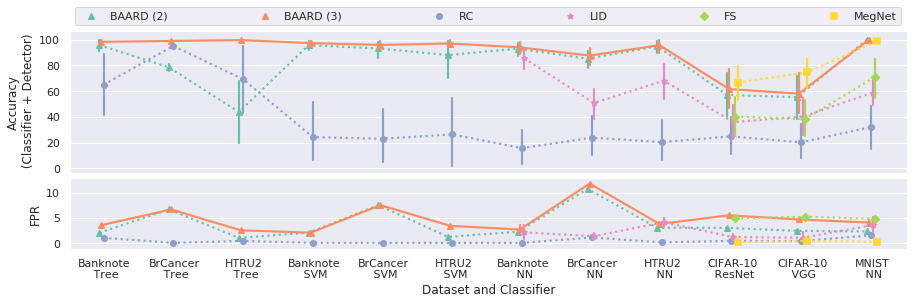

In [213]:
#plt.figure(figsize=(15,3))
#sns.set(style='white')
sns.set_theme()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.2})
#f, ax = plt.subplots(2,1, figsize=(15,5))
fig = plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
gs.update(hspace=0.05)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
m = ['^', '^', 'o', '*', 'D', 's']
l = [':', '-', ':', ':', ':', ':']
p = 'Set2'

s1 = sns.pointplot(x='Dataset and Classifier', y='Acc_on_adv', hue='Defence', data=res, ax=ax0,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, dodge=True, linestyles=l, markers=m)#, join=False, scale=2)
s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
s1.legend_.remove()

s2 = sns.pointplot(x='Dataset and Classifier', y='FPR', hue='Defence', data=res, ax=ax1,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, dodge=True, linestyles=l, markers=m)#, join=False, scale=2)
s2.set(ylabel="FPR")

plt.legend(bbox_to_anchor=(0., 3.4, 1., .102), loc='upper center', ncol=6, mode="expand", borderaxespad=0.5)

plt.savefig('Plots/Lineplot_ACC_FPR_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

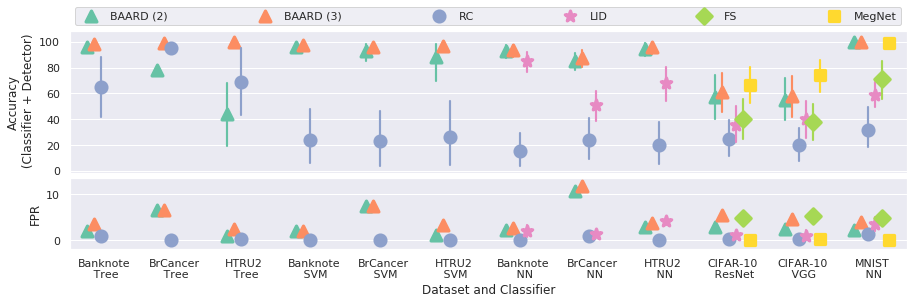

In [214]:
#plt.figure(figsize=(15,3))
#sns.set(style='white')
sns.set_theme()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.2})
#f, ax = plt.subplots(2,1, figsize=(15,5))
fig = plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
gs.update(hspace=0.05)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
m = ['^', '^', 'o', '*', 'D', 's']
l = [':', '-', ':', ':', ':', ':']
p = 'Set2'
d = 0.5

s1 = sns.pointplot(x='Dataset and Classifier', y='Acc_on_adv', hue='Defence', data=res, ax=ax0,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, dodge=d, linestyles=l, markers=m, join=False, scale=2)
s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
s1.legend_.remove()

s2 = sns.pointplot(x='Dataset and Classifier', y='FPR', hue='Defence', data=res, ax=ax1,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n NN', 'BrCancer\n NN', 'HTRU2\n NN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n NN'],
                 palette=p, dodge=d, linestyles=l, markers=m, join=False, scale=2)
s2.set(ylabel="FPR")

plt.legend(bbox_to_anchor=(0., 3.4, 1., .102), loc='upper center', ncol=6, mode="expand", borderaxespad=0.5)

plt.savefig('Plots/Pointplot_ACC_FPR_all.pdf', format='pdf', dpi=1200, bbox_inches='tight')

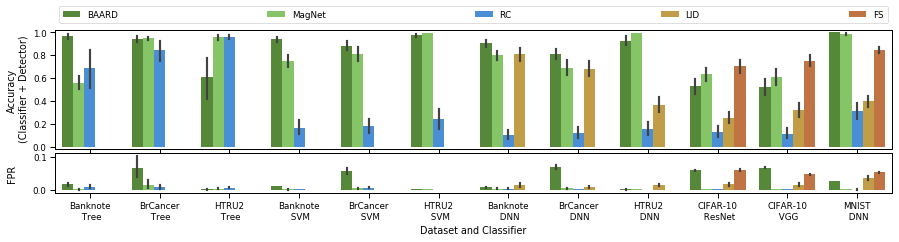

In [26]:
sns.set_context("paper")
#f, ax = plt.subplots(2,1, figsize=(15,5))
fig = plt.figure(figsize=(15,3))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
gs.update(hspace=0.05)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
p = cols
d = 0.5

s1 = sns.barplot(x='Dataset and Classifier', y='acc_on_adv', hue='Defence', data=df, ax=ax0,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n DNN', 'BrCancer\n DNN', 'HTRU2\n DNN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n DNN'],
                 palette=p)
s1.set(ylabel="Accuracy\n (Classifier + Detector)", xlabel=None, xticklabels=[])
s1.legend_.remove()
s1.set(ylim=(-0.02,1.02))

s2 = sns.barplot(x='Dataset and Classifier', y='fpr', hue='Defence', data=df, ax=ax1,
                 order=['Banknote\n Tree', 'BrCancer\n Tree', 'HTRU2\n Tree', 
                        'Banknote\n SVM', 'BrCancer\n SVM', 'HTRU2\n SVM',
                        'Banknote\n DNN', 'BrCancer\n DNN', 'HTRU2\n DNN',
                        'CIFAR-10\n ResNet', 'CIFAR-10\n VGG', 'MNIST\n DNN'],
                 palette=p)
s2.set(ylabel="FPR\n")
s2.set(ylim=(-0.01,0.11))

plt.legend(bbox_to_anchor=(0., 4.7, 1., .102), loc='upper center', ncol=6, mode="expand", borderaxespad=0.5)

plt.savefig('Barplot_ACC_FPR_all_new.pdf', format='pdf', dpi=1200, bbox_inches='tight')